In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [166]:
from implementations import *

In [3]:
DATA_TRAIN_PATH = '../data/train.csv'
DATA_TEST_PATH = '../data/test.csv'
y_train, tX_train, ids_train = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH, sub_sample=False)

# Data analysis

In [4]:
N = len(y_train)
D = tX_train.shape[1]
print("We have {} datapoints for training with {} features.".format(N,D))

We have 250000 datapoints for training with 30 features.


In [5]:
df = pd.DataFrame(tX_train)
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,-0.277,258.733,2.0,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,-1.916,164.546,1.0,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,-2.186,260.414,1.0,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,...,0.060,86.062,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,...,-0.871,53.131,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,...,2.859,144.665,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,...,-0.867,80.408,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
249997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,...,-2.890,198.907,1.0,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992
249998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,...,0.811,112.718,0.0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [6]:
nan_cols = 0
df_nan = df.replace(-999., np.nan)
for col in df_nan.columns:
    if df_nan[col].isnull().values.any():
        nan_cols+=1
        nan_amount = df_nan[col].isnull().sum()
        print("Feature {} has {} NaNs ({:.3f}%)".format(col, nan_amount, 100.*nan_amount/N))
print("\nTOTAL {} columns have NaNs".format(nan_cols))

Feature 0 has 38114 NaNs (15.246%)
Feature 4 has 177457 NaNs (70.983%)
Feature 5 has 177457 NaNs (70.983%)
Feature 6 has 177457 NaNs (70.983%)
Feature 12 has 177457 NaNs (70.983%)
Feature 23 has 99913 NaNs (39.965%)
Feature 24 has 99913 NaNs (39.965%)
Feature 25 has 99913 NaNs (39.965%)
Feature 26 has 177457 NaNs (70.983%)
Feature 27 has 177457 NaNs (70.983%)
Feature 28 has 177457 NaNs (70.983%)

TOTAL 11 columns have NaNs


In [7]:
res = df_nan.describe()

In [8]:
### Analysing features
for feature in range(D):
    if feature == 22:
        print("Feature {}.\tDiscrete in (0.0, 1.0, 2.0, 3.0)".format(feature))
    else:
        print("Feature {}.\tContinous\tmin: {:>7.3f}\tmax: {:>8.3f}".format(feature, res.loc['min'][feature], res.loc['max'][feature]))

Feature 0.	Continous	min:   9.044	max: 1192.026
Feature 1.	Continous	min:   0.000	max:  690.075
Feature 2.	Continous	min:   6.329	max: 1349.351
Feature 3.	Continous	min:   0.000	max: 2834.999
Feature 4.	Continous	min:   0.000	max:    8.503
Feature 5.	Continous	min:  13.602	max: 4974.979
Feature 6.	Continous	min: -18.066	max:   16.690
Feature 7.	Continous	min:   0.208	max:    5.684
Feature 8.	Continous	min:   0.000	max: 2834.999
Feature 9.	Continous	min:  46.104	max: 1852.462
Feature 10.	Continous	min:   0.047	max:   19.773
Feature 11.	Continous	min:  -1.414	max:    1.414
Feature 12.	Continous	min:   0.000	max:    1.000
Feature 13.	Continous	min:  20.000	max:  764.408
Feature 14.	Continous	min:  -2.499	max:    2.497
Feature 15.	Continous	min:  -3.142	max:    3.142
Feature 16.	Continous	min:  26.000	max:  560.271
Feature 17.	Continous	min:  -2.505	max:    2.503
Feature 18.	Continous	min:  -3.142	max:    3.142
Feature 19.	Continous	min:   0.109	max: 2842.617
Feature 20.	Continous	min:  -3

## We can try to remove columns with NaNs

In [9]:
df_no_nans = df_nan.dropna(axis=1)
print(df_no_nans.shape)

(250000, 19)


In [10]:
df_no_nans_norm = (df_no_nans - df_no_nans.mean(axis=0)) /df_no_nans.std(axis=0)

## Replace NaNs with 0

In [11]:
df_zeros = df.replace(-999., 0.)
df_zeros.shape

(250000, 30)

In [12]:
df_zeros_norm = (df_zeros - df_zeros.mean(axis=0))/df_zeros.std(axis=0)

## Create 4 dfs according to feature 22

In [13]:
df0 = df_no_nans[df_no_nans[22] == 0].drop(columns=22)
df1 = df_no_nans[df_no_nans[22] == 1].drop(columns=22)
df2 = df_no_nans[df_no_nans[22] == 2].drop(columns=22)
df3 = df_no_nans[df_no_nans[22] == 3].drop(columns=22)
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print((len(df0)+len(df1)+len(df2)+len(df3)))

(99913, 18)
(77544, 18)
(50379, 18)
(22164, 18)
250000


In [14]:
df0_norm = (df0-df0.mean())/df0.std()
df1_norm = (df1-df1.mean())/df1.std()
df2_norm = (df2-df2.mean())/df2.std()
df3_norm = (df3-df3.mean())/df3.std()

In [20]:
initial_w = np.random.randn(19,1)

(19, 1)

In [201]:
from cross_validation import cross_validation_SGD, cross_validation_ridge

## LEAST SQUARES

### df_no_nans_norm

In [160]:
tr = []
te = []
gammas = np.logspace(-4, -2, 10)
for gamma in gammas:
    w_best, training_errors, validation_errors = \
    cross_validation_SGD(y=y_train.reshape((-1,1)), tx=df_no_nans_norm.values, K=4,
                         initial_w=initial_w, max_iters=10000, gamma=gamma, batch_size=1,
                         loss_kind="LEAST_SQUARE", seed=1)
    print(training_errors)
    tr.append(np.mean(training_errors))
    te.append(np.mean(validation_errors))

[2.4609371547135686, 2.5339676745700856, 2.5064628238373725, 2.4996730515494066]
[1.4111640830995442, 1.4200321303732033, 1.397515547250076, 1.3982624750640253]
[0.8009409113790322, 0.7568903869750392, 0.7525043254231893, 0.7528898711740395]
[0.5231622609753844, 0.493646789485927, 0.49811637556044597, 0.49594254655212894]
[0.43128625063675674, 0.4280736437860574, 0.4293470100782446, 0.43021468590893697]
[0.4142836208885106, 0.41465815844322435, 0.4116392485276812, 0.41972265527630587]
[0.41588765764621366, 0.41197171560906864, 0.40738595177095405, 0.4260928230101191]
[0.4237668863659394, 0.41372338188399826, 0.4085687989740195, 0.44285874725055885]
[0.43576269800122464, 0.41921113007324134, 0.41459885172646316, 0.469082012459883]
[0.4529161299478188, 0.43178369188463184, 0.42484672260026224, 0.5359029450414265]


[]

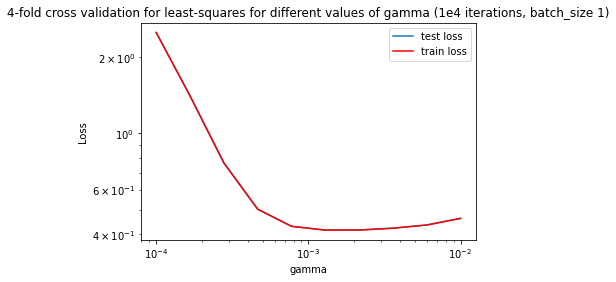

In [161]:
plt.plot(gammas, te, label="test loss")
plt.plot(gammas, tr, 'r', label="train loss")
plt.xscale('log')
plt.yscale('log')
plt.title("4-fold cross validation for least-squares for different values of gamma (1e4 iterations, batch_size 1)")
plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend()
plt.plot()

In [162]:
gamma_star = gammas[np.argmin(te)]
gamma_star

0.001291549665014884

In [195]:
initial_w = np.random.rand(19,1)
w_best, training_errors, validation_errors = \
    cross_validation_SGD(y=y_train.reshape((-1,1)), tx=df_no_nans_norm.values, K=4,
                         initial_w=initial_w, max_iters=1000000, gamma=1e-3, batch_size=1,
                         loss_kind="LEAST_SQUARE", seed=1)

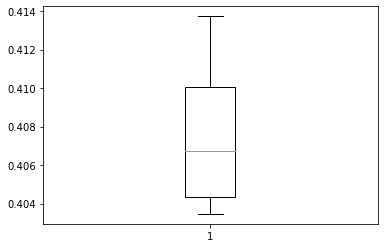

In [196]:
plt.boxplot(validation_errors)
plt.show()

In [208]:
initial_w = np.random.rand(19,1)
te = []
tr = []

lambdas = np.logspace(-6, -3, 8)
for lambda_ in lambdas:
    w_best, training_errors, validation_errors = \
        cross_validation_ridge(y=y_train.reshape((-1,1)), tx=df_no_nans_norm.values, K=4, seed=1, lambda_=lambda_)
    te.append(np.mean(validation_errors))
    tr.append(np.mean(training_errors))

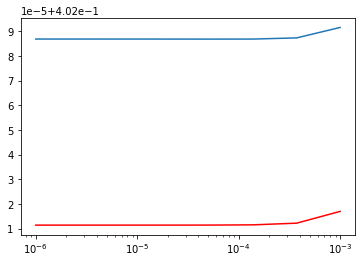

In [209]:
plt.plot(lambdas, te)
plt.plot(lambdas, tr, 'r')
plt.xscale('log')

In [225]:
def build_polyy(x, degree):
    n, d = x.shape
    accu_expanded = np.c_[np.ones((n,1)),x]

    for deg in range(degree):
        accu_expanded = np.c_[accu_expanded, x**(deg+1)]
        
    feature_pairs_dict = {}
    key = 0
    for i in range(d):
        for j in range(i+1,d):
            feature_pairs_dict[key] = [i,j]
            key += 1
    
    pair_columns = np.zeros((n, len(feature_pairs_dict)) )

    for i, pair in feature_pairs_dict.items():
        pair_columns[:, i] = x[:, pair[0]] * x[:, pair[1]]

    accu_expanded =  np.c_[accu_expanded,pair_columns]

    return accu_expanded

In [226]:
initial_w = np.random.rand(19,1)
te = []
tr = []
degrees = range(8)
tx = df_no_nans_norm.values
for deg in degrees:
    tx_expanded = build_polyy(tx, deg)
    w_best, training_errors, validation_errors = \
        cross_validation_ridge(y=y_train.reshape((-1,1)), tx=tx_expanded, K=4, seed=1, lambda_=1e-4)
    te.append(np.mean(validation_errors))
    tr.append(np.mean(training_errors))

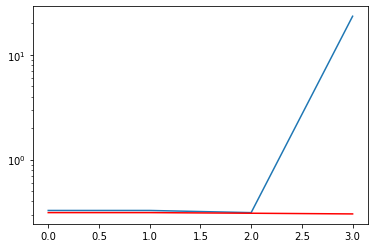

In [229]:
plt.plot(degrees[:-4], te[:-4])
plt.plot(degrees[:-4], tr[:-4], 'r')
plt.yscale('log')